In [1]:
from datetime import timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import transformation
import data_filter as dafi
import estimate_height as esth

In [2]:
import math
x = 4155252.3307
y = 674064.7850
z = 4775969.2638
lat,lon,height = transformation.xyz2latlon(x,y,z)
print(lat/math.pi*180)
print(lon/math.pi*180)
print(height)

48.797647635874426
9.214252131825374
270.97025138139725


In [3]:
main_path = 'E:/OneDrive/Studium/MA/data/20220526/2/'
#main_path = 'E:/OneDrive/Studium/MA/data/20220526/3/'

data_dict = dafi.generate_dataframe(main_path)
satellite_list = data_dict.keys()

azimut_mask = [140,320]
elevation_mask = [0,60]
for satellite_code in satellite_list:
    data_dict[satellite_code] = dafi.azimut_filter(data_dict[satellite_code],azimut_mask)
    data_dict[satellite_code] = dafi.elevation_filter(data_dict[satellite_code],elevation_mask)

In [4]:
print(satellite_list)

dict_keys(['G01', 'G03', 'G04', 'G06', 'G09', 'G17', 'G19', 'G31', 'G11', 'G02', 'R04', 'R05', 'R06', 'R14', 'R15', 'R20', 'R21', 'R22', 'R07', 'E04', 'E05', 'E09', 'E11', 'E36', 'E34', 'E01', 'G07', 'E31', 'G20', 'G16', 'G30', 'R23', 'R09'])


In [7]:
satellite_code = 'G06'
dataframe = data_dict[satellite_code]
print(dataframe)


                          time   azimut  elevation   snr1   snr2
0    2022-05-26 19:31:05+00:00  306.753     41.273  46.45  40.50
1    2022-05-26 19:31:06+00:00  306.749     41.280  46.55  39.45
2    2022-05-26 19:31:07+00:00  306.746     41.287  46.35  39.85
3    2022-05-26 19:31:08+00:00  306.743     41.293  46.30  39.70
4    2022-05-26 19:31:09+00:00  306.740     41.300  46.35  40.15
...                        ...      ...        ...    ...    ...
7980 2022-05-26 21:44:05+00:00  219.754     44.444  49.60  49.65
7981 2022-05-26 21:44:06+00:00  219.747     44.437  49.55  49.60
7982 2022-05-26 21:44:07+00:00  219.741     44.430  49.60  49.60
7983 2022-05-26 21:44:08+00:00  219.735     44.423  49.60  49.60
7984 2022-05-26 21:44:09+00:00  219.728     44.417  49.65  49.70

[6978 rows x 5 columns]


In [ ]:
min_height = 1
max_height = 3 # meter
time_interval = 2 # minutes
time_delta = timedelta(minutes=time_interval)

if not dataframe.empty:
    time_list, height_list, azimut_list = esth.split_result(dataframe,time_interval,min_height,max_height)


[Timestamp('2022-05-26 19:32:05+0000', tz='UTC'), Timestamp('2022-05-26 19:34:05+0000', tz='UTC'), Timestamp('2022-05-26 19:36:05+0000', tz='UTC'), Timestamp('2022-05-26 19:38:05+0000', tz='UTC'), Timestamp('2022-05-26 19:40:05+0000', tz='UTC'), Timestamp('2022-05-26 19:42:05+0000', tz='UTC'), Timestamp('2022-05-26 19:44:05+0000', tz='UTC'), Timestamp('2022-05-26 19:46:05+0000', tz='UTC'), Timestamp('2022-05-26 19:48:05+0000', tz='UTC'), Timestamp('2022-05-26 19:50:05+0000', tz='UTC'), Timestamp('2022-05-26 19:52:05+0000', tz='UTC'), Timestamp('2022-05-26 19:54:05+0000', tz='UTC'), Timestamp('2022-05-26 19:56:05+0000', tz='UTC'), Timestamp('2022-05-26 19:58:05+0000', tz='UTC'), Timestamp('2022-05-26 20:00:05+0000', tz='UTC'), Timestamp('2022-05-26 20:02:05+0000', tz='UTC'), Timestamp('2022-05-26 20:04:05+0000', tz='UTC'), Timestamp('2022-05-26 20:06:05+0000', tz='UTC'), Timestamp('2022-05-26 20:08:05+0000', tz='UTC'), Timestamp('2022-05-26 20:10:05+0000', tz='UTC'), Timestamp('2022-05-

f:\Anaconda\envs\gnss_ir\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


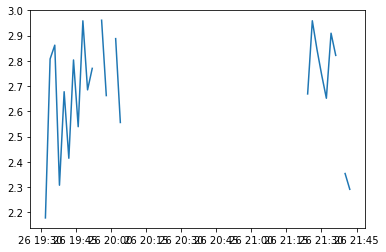

In [6]:
print(time_list)
print(height_list)

plt.plot(time_list,height_list)